In [ ]:
"""using monte-carlo simulation find the area of the curve I = integral from -20 to 20 of the curve exp(-x^2)""""

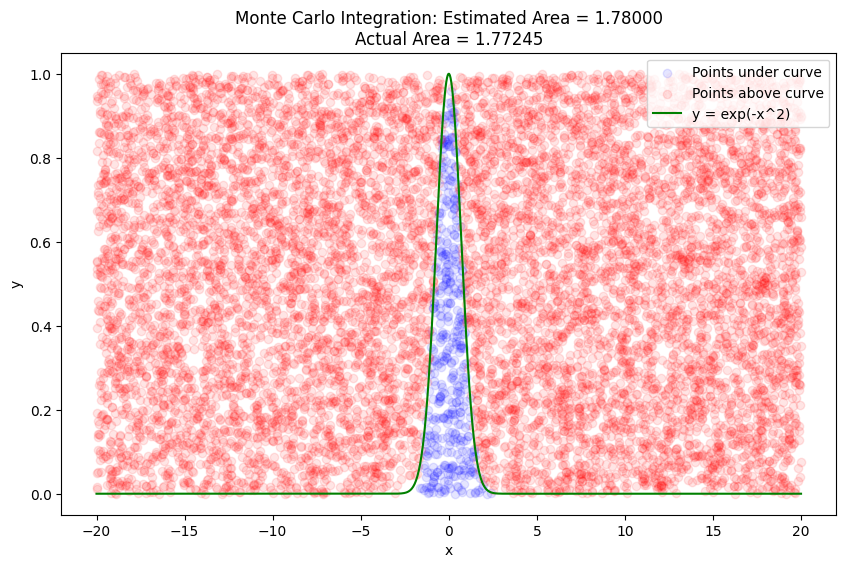

Monte Carlo Estimated Area: 1.78000
Actual Area (Numerical Integration): 1.77245


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def f(x):
    return np.exp(-(x**2))

def monte_carlo_integration(num_points=10000, x_min=-20, x_max=20):
    # y_min is 0 (curve starts at y=0)
    y_min, y_max = 0, 1

    # Generate random points
    x = np.random.uniform(x_min, x_max, num_points)
    y = np.random.uniform(y_min, y_max, num_points)

    # Count points under the curve
    points_under_curve = y <= f(x)

    # Calculate area
    total_area = (x_max - x_min) * (y_max - y_min)
    area_under_curve = total_area * np.sum(points_under_curve) / num_points

    return area_under_curve, points_under_curve, x, y

# Perform Monte Carlo integration
result, points_under_curve, x, y = monte_carlo_integration()

# Calculate actual area using numerical integration
actual_area, _ = quad(f, -20, 20)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(x[points_under_curve], y[points_under_curve], c='blue', alpha=0.1, label='Points under curve')
plt.scatter(x[~points_under_curve], y[~points_under_curve], c='red', alpha=0.1, label='Points above curve')

x_curve = np.linspace(-20, 20, 1000)
plt.plot(x_curve, f(x_curve), 'g-', label='y = exp(-x^2)')
plt.title(f'Monte Carlo Integration: Estimated Area = {result:.5f}\nActual Area = {actual_area:.5f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print(f"Monte Carlo Estimated Area: {result:.5f}")
print(f"Actual Area (Numerical Integration): {actual_area:.5f}")
